# Pogona Notebook

In [1]:
from Detector.detector import Detector_v4, Detector_v3
from PIL import Image
import torch
from torchvision import transforms
import Detector.visualize as visualize
import re
import glob
import os
import numpy as np
import imp
import matplotlib.pyplot as plt
import cv2 as cv
import pandas as pd
import pickle
import seaborn as sns
#from tqdm import tqdm_notebook as tqdm
import tqdm
import imp
import Dataset.dataset as dataset
from IPython.display import display, HTML
from sklearn.mixture import GaussianMixture
from scipy import stats

In [2]:
detector = Detector_v4(weights_path='Detector/Yolo4/yolo4_gs_best_2306.weights',
                      cfg_path='Detector/Yolo4/yolo4_2306.cfg')

Detector initiated successfully


In [26]:
detector.set_input_size(1440,1080)

## Save prediction video

In [33]:
imp.reload(visualize)

<module 'Detector.visualize' from '/app/Pogona_realtime/Detector/visualize.py'>

In [34]:
NUM_FRAMES = 3000
input1 = "../Pogona_Pursuit/Arena/experiments/fast_cockroach_line_20200730T131606/trial2/videos/20200730-132239/19506468.avi"
input2 = "../Pogona_Pursuit/Arena/output/20200615-175044/19506481.avi"
input3 = "../Pogona_Pursuit/Arena/experiments/circle_worm_20200730T125503/trial1/videos/20200730-125503/19506468.avi"

test_video_path = "./Arena/output/20200615-175044/19506481.avi"

visualize.process_video(input1, 
                        "labelled/testpv20200730fck.mp4", 
                        [visualize.online_centroid_visualizer(detector, (0, 0, 255), 90)])

100%|██████████| 5079/5079 [02:18<00:00, 36.80it/s]


Read :  207.0
Rsz_inf :  73.0
Write :  137.0
Average FPS:  39.0


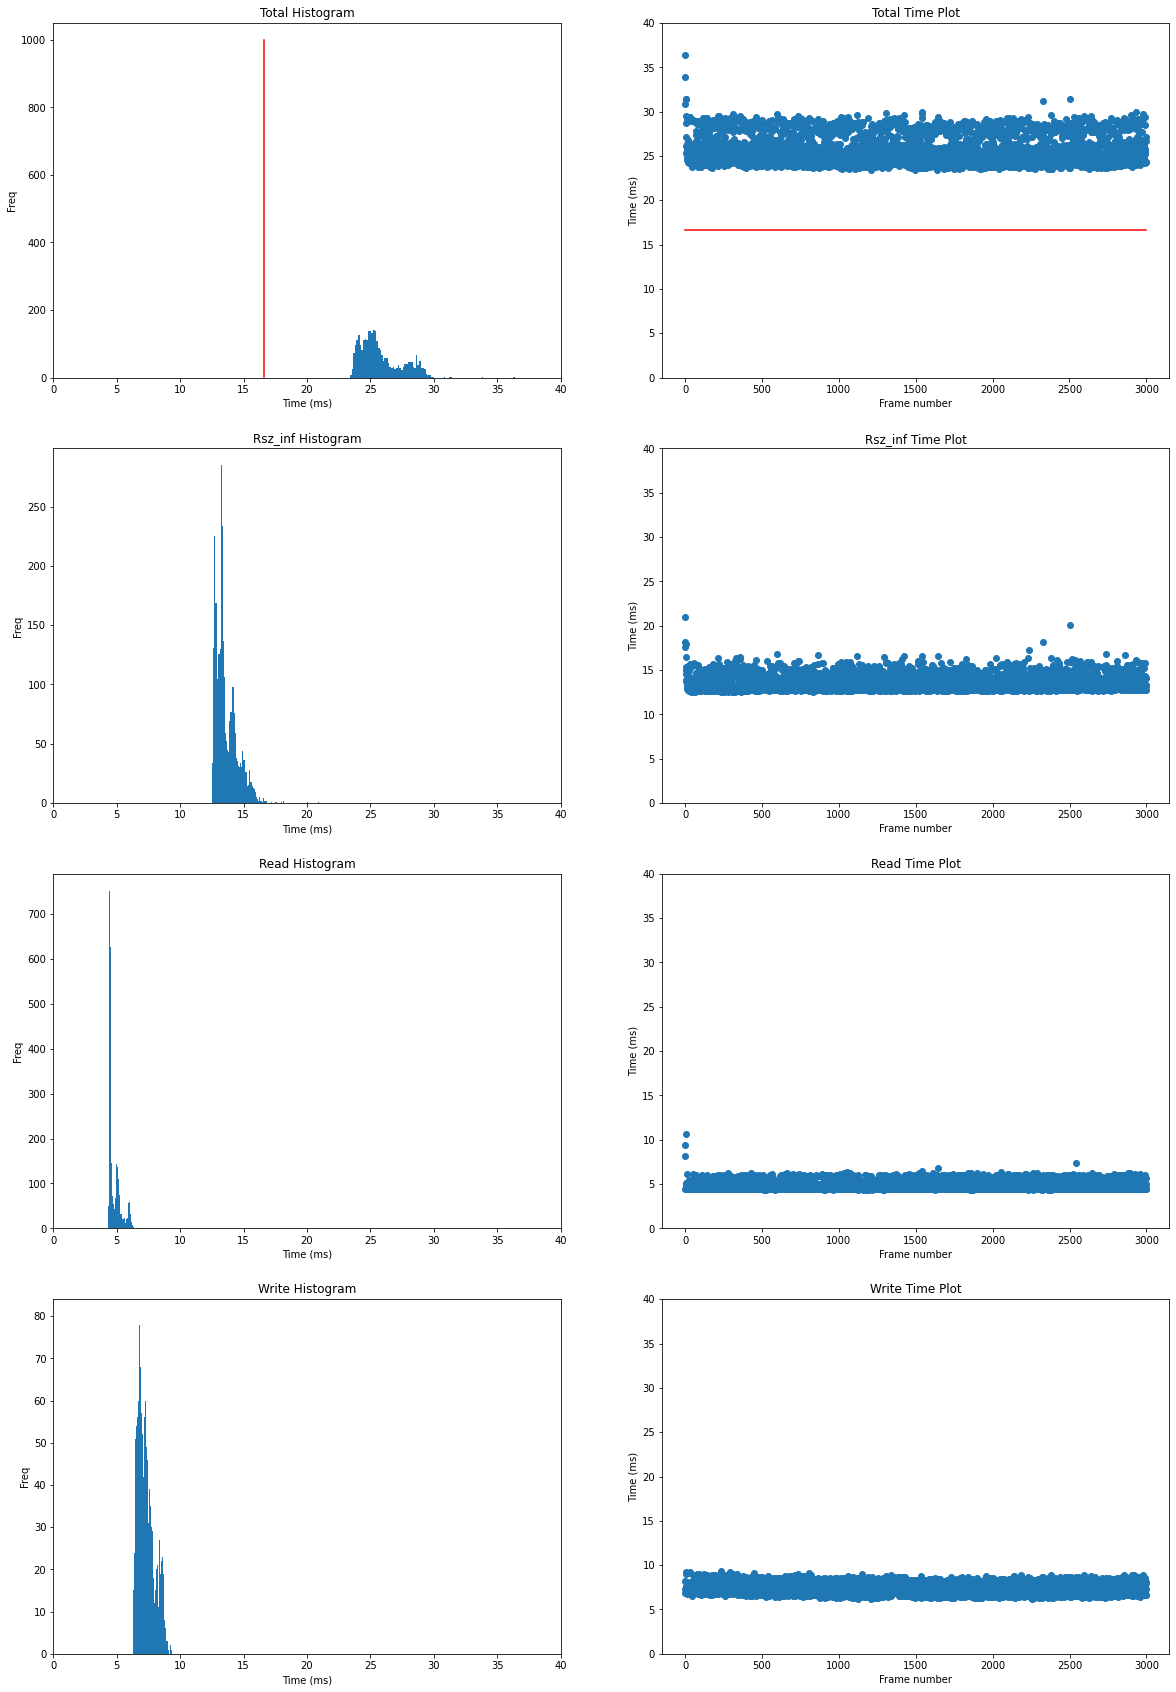

In [15]:
# analyzq timings

XLIM=40
YLIM=40

TOTAL_XLIM = 80
TOTAL_YLIM = 80

centros = centroids[:,:2]
speed = visualize.compute_velocity(centros)

confs = centroids[:,2]
for k in times.keys():
    print(k,": ",round(1/times[k].mean()))
times['Total'] = np.sum(np.stack([times[k] for k in times.keys() if k!='Total'],axis=1),axis=1)
print("Average FPS: ",round(1/times['Total'].mean()))



phases = ['Rsz_inf','Read','Write'] # sorted order
fig,axs = plt.subplots(len(phases)+1,2,figsize=(20,30))
k='Total'
axs[0][0].set_title(k+' Histogram')
axs[0][1].set_title(k+' Time Plot')
axs[0][0].hist(times[k]*1000,label=k,bins=100)
axs[0][0].set_xlim(0,XLIM)
axs[0][0].set_xlabel('Time (ms)')
axs[0][1].set_xlabel('Frame number')
axs[0][0].set_ylabel('Freq')
axs[0][1].set_ylabel('Time (ms)')
axs[0][1].scatter(np.arange(times[k].shape[0]),times[k]*1000)
axs[0][1].set_ylim(0,YLIM)
axs[0][0].plot(np.ones(5)*16.6,np.linspace(1,1000,5),color='r')
axs[0][1].plot(np.linspace(1,3000,5),np.ones(5)*16.6,color='r')
for i,k in enumerate(phases):
    i+=1
    axs[i][0].set_title(k+' Histogram')
    axs[i][1].set_title(k+' Time Plot')
    axs[i][0].hist(times[k]*1000,label=k,bins=100)
    axs[i][0].set_xlim(0,XLIM)
    axs[i][0].set_xlabel('Time (ms)')
    axs[i][1].set_xlabel('Frame number')
    axs[i][0].set_ylabel('Freq')
    axs[i][1].set_ylabel('Time (ms)')
    axs[i][1].scatter(np.arange(times[k].shape[0]),times[k]*1000)
    axs[i][1].set_ylim(0,YLIM)
#plt.savefig('timings.jpg')

## Plot with figure on video with centroids

In [19]:
%matplotlib agg
#imp.reload(visualize)
#test_video_path = "./Arena/output/20200615-175044/19506481.avi"
visualize.plot_with_figure(input_name=test_video_path,
                           output_name='labelled/1506_181757_2306_figure.mp4',
                           centroids=centroids,
                           num_frames=1000)

  0%|          | 2/1000 [00:00<01:04, 15.57it/s]

width: 1440, height: 1080


100%|██████████| 1000/1000 [01:47<00:00,  9.31it/s]


## Save missed frames

In [3]:
test_video_path = "/media/sil2/regev/pose_estimation/Arena/output/20200521-195335/19506481-0000.avi"
vid_name = '19506481-0000.avi'
path_to = '/media/sil2/regev/pose_estimation/Arena/output/20200521'
L = glob.glob(path_to+'*')
video_paths = []
output_paths = []
for file in L:
    vid_time = re.search('20200521-(\d+)',file).group(1)
    p = os.path.join(path_to+'-'+vid_time,vid_name)
    if os.path.exists(p):
        video_paths.append(p)
        output_paths.append("labelled/arrow_" + vid_time + ".mp4")
        
video_paths

['/media/sil2/regev/pose_estimation/Arena/output/20200521-172245/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-172519/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-172637/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-172842/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-173206/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-173410/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-173606/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-174011/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-174247/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-174430/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-175816/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-180046/

In [30]:
for i in range(len(video_paths)):
    if re.search('20200521-(\d+)',video_paths[i]).group(1)[:2]=='17':
        continue
    inf_time = visualize.save_pred_video(video_paths[i], video_paths[i], detector)
    #print("Inference framerate:", 1/inf_time)

NameError: name 'video_paths' is not defined

In [81]:
imp.reload(visualize)

<module 'Detector.visualize' from '/app/Pogona_realtime/Detector/visualize.py'>

In [83]:
vid_path = '../Pogona_Pursuit/Arena/experiments/circle_20200803T092248/trial1/videos/20200803-092248/19506468.avi'

visualize.process_video(vid_path, None, 
                        [visualize.missed_frames_saver(detector, './test_save_missed/', save_thresh=0.98, above=False, draw_bbox=False)], 
                        num_frames=1000)



100%|██████████| 1000/1000 [00:18<00:00, 53.26it/s][A


## Abaltion study

In [25]:
im_good = cv.imread('test_images/test_high.jpg')
im_none = cv.imread('test_images/test_none.jpg')
im_low = cv.imread('test_images/test_low4.jpg')

In [27]:
%matplotlib inline

Possible cell sizes are [1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 15, 18, 20, 24, 30, 36, 40, 45, 60, 72, 90, 120, 180, 360]
Please choose cell size from the list:


 45


cells x: 32, cells y: 24, total of 768 iterations. Continue [y/n]?


 y


Rows: 100%|██████████| 24/24 [00:12<00:00,  1.88it/s]


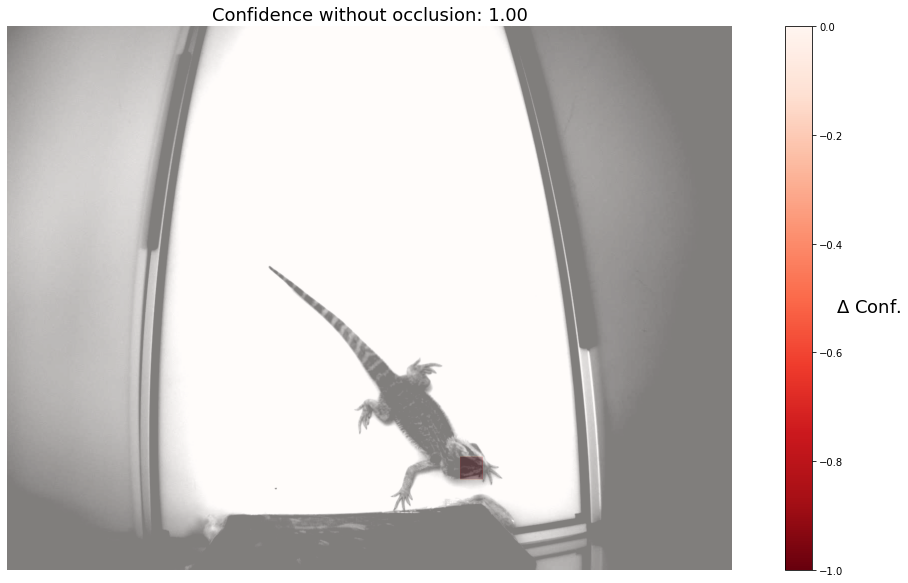

In [39]:
visualize.visualize_ablation_heatmap(im_good,
                                     detector)

Possible cell sizes are [1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 15, 18, 20, 24, 30, 36, 40, 45, 60, 72, 90, 120, 180, 360]
Please choose cell size from the list:


 72


cells x: 20, cells y: 15, total of 300 iterations. Continue [y/n]?


 y


Rows: 100%|██████████| 15/15 [00:05<00:00,  2.99it/s]


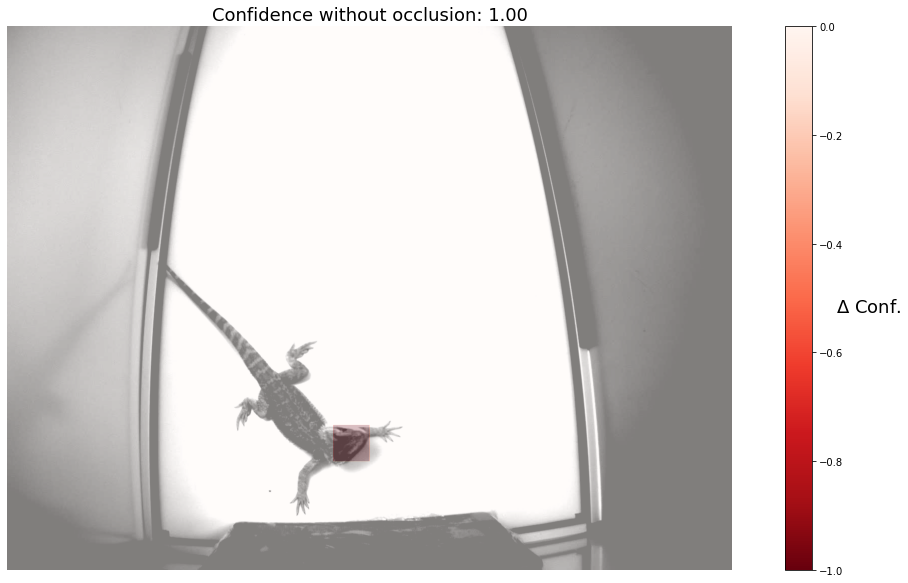

In [43]:
visualize.visualize_ablation_heatmap(im_none,
                                     detector)

Possible cell sizes are [1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 15, 18, 20, 24, 30, 36, 40, 45, 60, 72, 90, 120, 180, 360]
Please choose cell size from the list:


 45


cells x: 32, cells y: 24, total of 768 iterations. Continue [y/n]?


 y


Rows: 100%|██████████| 24/24 [00:12<00:00,  1.87it/s]


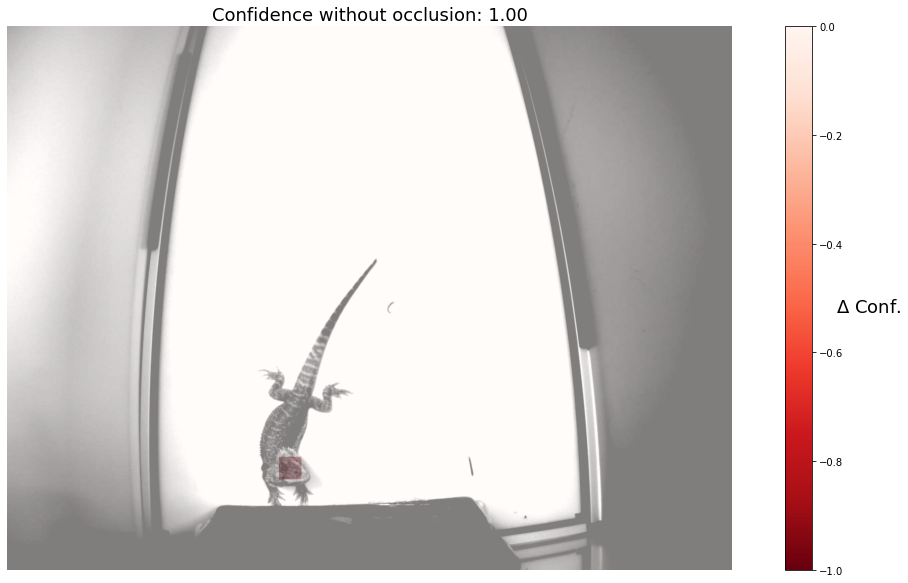

In [36]:
visualize.visualize_ablation_heatmap(im_low,
                                     detector)

For iamges with no or low confidence detection, the ablation may reveal 
what parts of the image cause the detector to fail. 
In the example of test_none.jpg, we can see that if the hand is occluded,
the confidence spikes, so we can deduce that for some reason, this is the part of the inmage
causing the low confidence

In [34]:
im = cv.imread('test_images/test_none_noshadow.jpeg')

In [9]:
detector.set_conf_and_nms(new_conf_thres=0.01)

In [17]:
imgs = os.listdir('/home/user/darknet/data/obj')

# Testing filterpy

In [48]:
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
from scipy.linalg import block_diag

In [49]:
my_filter = KalmanFilter(dim_x=4, dim_z=2)
my_filter.x = np.zeros(4) # later init filter with initial location

my_filter.F = np.array([[1.,1.,0.,0.],
                        [0.,1.,0.,0.],
                        [0.,0.,1.,1.],
                        [0.,0.,0.,1.]])    # state transition matrix

my_filter.H = np.array([[1.,0.,0.,0.],
                        [0.,0.,1.,0.]])    # Measurement function
my_filter.P *= 1.                 # covariance matrix
my_filter.R *= 5.      # state uncertainty
q = Q_discrete_white_noise(dim=2, dt=1, var=.1)
my_filter.Q = block_diag(q, q)

In [50]:
d = dict()
for exper in all_exper.keys():
    for k in range(1,all_exper[exper]['num_trials']+1):
        if not all_exper[exper]['trials'][k]['no_realtime']:
            if not all_exper[exper]['trials'][k]['no_screen']:
                d[(exper,k)] =  all_exper[exper]['trials'][k]['screen'].shape[0]

In [51]:
dsort = sorted(d, key=d.get)

In [55]:
test_vid_path = '../Pogona_Pursuit/Arena/experiments/line_20200803T081429/trial1/videos/20200803-081429/19506468.avi'

In [56]:
test_df = all_exper['line_20200803T081429']['trials'][1]['frames']
centroids = test_df[['centroid_x','centroid_y']].values

In [57]:
my_filter.F

array([[1., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.]])

In [58]:
cents_df.k[1]

NameError: name 'cents_df' is not defined

In [59]:
cents_pred = np.zeros((centroids.shape[0],7))
cents_pred[:] = np.nan

MIN_Y = 930
MAX_K = 30

for i in range(len(centroids)):
    meas = centroids[i, :2]
    if np.isnan(meas[0]) or np.isnan(meas[1]):
        continue
    #print(meas)
    my_filter.predict()
    my_filter.update(meas)

    # do something with the output
    x = my_filter.x
    cents_pred[i,:4] = x
    
    new_pred = x
    
    for j in range(MAX_K):
        new_pred = np.dot(my_filter.F, new_pred)
        pred_x,pred_y = new_pred[0],new_pred[2]
        if pred_y > MIN_Y or j == MAX_K - 1:
            cents_pred[i,4:] = np.array([pred_x,pred_y,j])
            break
cents_df = pd.DataFrame(data=cents_pred,columns=['x','vx','y','vy','pred_x','pred_y','k'])
cents_df = pd.concat([pd.DataFrame(centroids,columns=['det_x','det_y']),cents_df],axis=1)

In [60]:
imp.reload(visualize)

<module 'Detector.visualize' from '/app/Pogona_realtime/Detector/visualize.py'>

In [61]:
visualize.process_video(test_vid_path, "labelled/test_kalman_vis.mp4",
                        [visualize.offline_kalman_visualizer(cents_df, MAX_K)])

100%|██████████| 5081/5081 [01:19<00:00, 64.28it/s]


### Kalman for prediction noise reduction (point by point)

In [58]:
filtered_centroids = np.zeros((centroids.shape[0],4))
filtered_centroids[:] = np.nan

for i in range(len(centroids)):
    meas = centroids[i, :2]
    if np.isnan(meas[0]) or np.isnan(meas[1]):
        continue
    #print(meas)
    my_filter.predict()
    my_filter.update(meas)

    # do something with the output
    x = my_filter.x
    filtered_centroids[i] = x
    

In [63]:
imp.reload(visualize)

<module 'Detector.visualize' from '/app/Pogona_realtime/Detector/visualize.py'>

In [64]:
%matplotlib agg

visualize.plot_with_figure(input_name=input1,
                          output_name="./labelled/kf_test_20200730fastck.avi",
                          centroids = centroids,
                          num_frames=centroids.shape[0],
                          with_figure=False,
                          filtered_centroids=filt_xy)

/app/Pogona_realtime/Detector/visualize.py:553: RuntimeWarning: invalid value encountered in greater
  veloc[veloc > norm_speed] = np.nan
  0%|          | 8/5079 [00:00<01:10, 72.09it/s]

width: 1440, height: 1080


100%|██████████| 5079/5079 [01:15<00:00, 67.03it/s]


In [132]:
filt_deltas = centroids[:,:2] - filt_xy

# Calibration

In [20]:
imgs = [cv.imread('chkr1above.jpg'), cv.imread('chkr2above.jpg')]
imgs = [cv.cvtColor(im,cv.COLOR_BGR2GRAY) for im in imgs]

dims = [(6,9), (9,6)]

# Find the chess board corners
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp1 = np.zeros((6*9,3), np.float32)
objp1[:,:2] = np.mgrid[0:6,0:9].T.reshape(-1,2)

objp2 = np.zeros((6*9,3), np.float32)
objp2[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
objpoints.append(objp1)
objpoints.append(objp2)

imgpoints = [] # 2d points in image plane.
chkr_corners = []

for i, im in enumerate(imgs):
    ret, corners = cv.findChessboardCorners(im, dims[i], None)
    corners2 = cv.cornerSubPix(im,corners,dims[i],(-1,-1),criteria)

    chkr_corners.append(cv.drawChessboardCorners(chkr.copy(),tup,corners,ret))
    imgpoints.append(corners)
    
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, imgs[0].shape[::-1],None,None)

In [42]:
# undistort
h,  w = imgs[0].shape[:2]
alpha = 0.5 # determines the amount of distorted pixels in the output image somehow.

newcameramtx, roi=cv.getOptimalNewCameraMatrix(mtx,dist,(w,h),alpha,(w,h))
mapx,mapy = cv.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)

dst = cv.remap(imgs[0],mapx,mapy,cv.INTER_LINEAR)

# crop the image
#x,y,w,h = roi
#dst = dst[y:y+h, x:x+w]
#print(roi)

1080 1440


In [47]:
# get coordinate (50, 100) in the undistorted image.
mapx[50, 100], mapy[50, 100]
mapx.shape

(1080, 1440)

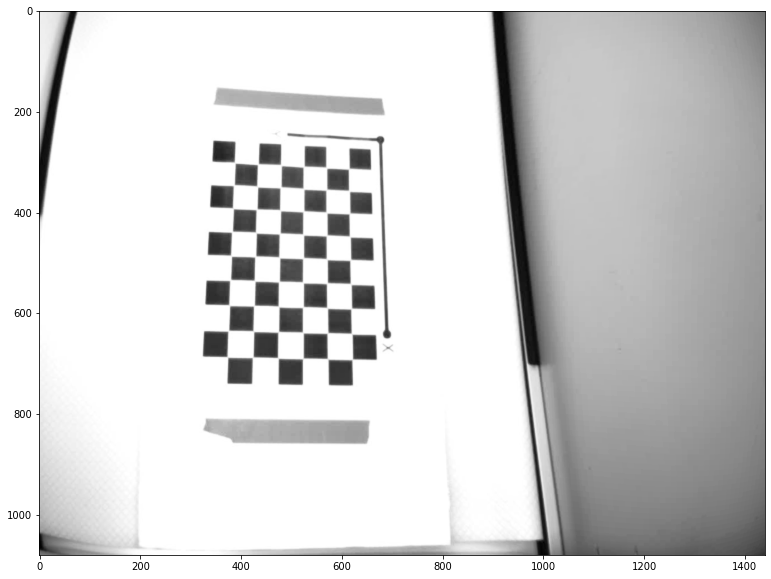

In [43]:
plt.figure(figsize=(13,13))
plt.imshow(dst,cmap='Greys_r')

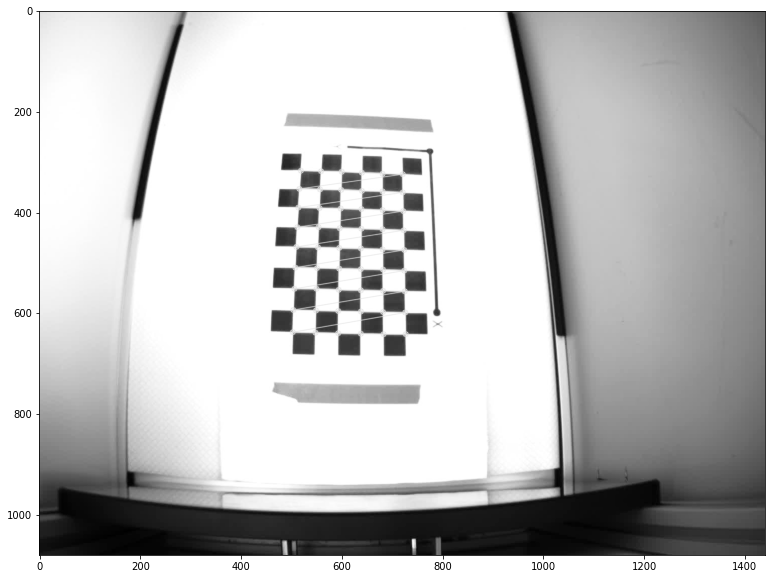

In [50]:
plt.figure(figsize=(13,13))
plt.imshow(chkr_corners[0],cmap='Greys_r')

# Detector and motion analysis

In [644]:
from Dataset import dataset

In [84]:
with open('Dataset/all_exper.p','wb') as fp:
    pickle.dump(all_exper,fp)

In [36]:
with open('Dataset/all_exper.p','rb') as fp:
    all_exper = pickle.load(fp)

In [23]:
d['trials'][1]['frames']

,centroid_x,centroid_y,left_x,top_y,right_x,bottom_y,conf,num_bbox,exper_name,trial,timestamp,hit_x,hit_y,bug_x,bug_y,touch_ts,hit
0,631.847351,635.558277,585.847351,594.558277,92.870605,83.004295,0.992603,1.0,circle_20200803T120911,1,2020-08-03 12:09:11.283965111,NaN,NaN,NaN,NaN,NaN,False
1,635.811512,633.703232,587.811512,591.703232,97.584740,84.627960,0.993092,1.0,circle_20200803T120911,1,2020-08-03 12:09:11.302442551,NaN,NaN,NaN,NaN,NaN,False
2,636.677029,632.965279,588.677029,590.965279,97.264229,84.850571,0.993700,1.0,circle_20200803T120911,1,2020-08-03 12:09:11.315297842,NaN,NaN,NaN,NaN,NaN,False
3,635.868599,633.716389,588.868599,591.716389,95.337143,84.409264,0.993496,1.0,circle_20200803T120911,1,2020-08-03 12:09:11.336664677,NaN,NaN,NaN,NaN,NaN,False
4,635.343517,634.271812,589.343517,592.271812,92.870583,84.974564,0.993840,1.0,circle_20200803T120911,1,2020-08-03 12:09:11.349446297,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5076,835.397644,843.409763,796.397644,795.409763,79.089844,96.514336,0.948455,1.0,circle_20200803T120911,1,2020-08-03 12:10:41.210280895,NaN,NaN,NaN,NaN,NaN,False
5077,834.947803,844.358459,794.947803,797.358459,80.172020,94.030762,0.962074,1.0,circle_20200803T120911,1,2020-08-03 12:10:41.231974125,NaN,NaN,NaN,NaN,NaN,False
5078,834.823608,843.411182,795.823608,796.411182,79.724976,95.406395,0.934434,1.0,circle_20200803T120911,1,2020-08-03 12:10:41.244113445,NaN,NaN,NaN,NaN,NaN,False
5079,835.691833,844.332653,796.691833,797.332653,78.438477,94.653664,0.955987,1.0,circle_20200803T120911,1,2020-08-03 12:10:41.263161421,NaN,NaN,NaN,NaN,NaN,False


In [22]:
all_exper['circle_20200803T120911']['trials'][1]['frames']

,centroid_x,centroid_y,left_x,top_y,right_x,bottom_y,conf,num_bbox,exper_name,trial,timestamp,hit_x,hit_y,bug_x,bug_y,touch_ts,hit
0,631.847351,635.558277,585.847351,594.558277,678.717957,677.562572,0.992603,1.0,circle_20200803T120911,1,2020-08-03 12:09:11.283965111,NaN,NaN,NaN,NaN,NaN,False
1,635.811512,633.703232,587.811512,591.703232,685.396252,676.331192,0.993092,1.0,circle_20200803T120911,1,2020-08-03 12:09:11.302442551,NaN,NaN,NaN,NaN,NaN,False
2,636.677029,632.965279,588.677029,590.965279,685.941257,675.815849,0.993700,1.0,circle_20200803T120911,1,2020-08-03 12:09:11.315297842,NaN,NaN,NaN,NaN,NaN,False
3,635.868599,633.716389,588.868599,591.716389,684.205742,676.125652,0.993496,1.0,circle_20200803T120911,1,2020-08-03 12:09:11.336664677,NaN,NaN,NaN,NaN,NaN,False
4,635.343517,634.271812,589.343517,592.271812,682.214100,677.246376,0.993840,1.0,circle_20200803T120911,1,2020-08-03 12:09:11.349446297,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5076,835.397644,843.409763,796.397644,795.409763,875.487488,891.924099,0.948455,1.0,circle_20200803T120911,1,2020-08-03 12:10:41.210280895,NaN,NaN,NaN,NaN,NaN,False
5077,834.947803,844.358459,794.947803,797.358459,875.119823,891.389221,0.962074,1.0,circle_20200803T120911,1,2020-08-03 12:10:41.231974125,NaN,NaN,NaN,NaN,NaN,False
5078,834.823608,843.411182,795.823608,796.411182,875.548584,891.817577,0.934434,1.0,circle_20200803T120911,1,2020-08-03 12:10:41.244113445,NaN,NaN,NaN,NaN,NaN,False
5079,835.691833,844.332653,796.691833,797.332653,875.130310,891.986317,0.955987,1.0,circle_20200803T120911,1,2020-08-03 12:10:41.263161421,NaN,NaN,NaN,NaN,NaN,False


In [25]:
for key in all_exper.keys():
    for k in range(1,all_exper[key]['num_trials']+1):
        print(f'{key}-{k}: {all_exper[key]["trials"][k]["frames"].shape}')

line_20200803T081429-1: (5081, 17)
line_20200803T081735-1: (5081, 11)
line_20200803T082002-1: (5081, 11)
fast_line_20200803T082414-1: (5081, 17)
fast_line_20200803T082724-1: (5081, 17)
circle_20200803T084227-1: (5081, 11)
circle_20200803T084227-2: (5081, 11)
circle_20200803T084529-1: (5081, 11)
circle_20200803T084529-2: (5081, 11)
fast_cockroach_20200803T085738-1: (5081, 17)
circle_20200803T090234-1: (5081, 17)
circle_20200803T090615-1: (5082, 11)
circle_20200803T091639-1: (5081, 17)
circle_20200803T092248-1: (5081, 17)
circle_20200803T093051-1: (5080, 11)
line_20200803T094928-1: (5081, 11)
line_20200803T095401-1: (5081, 11)
line_20200803T101641-1: (5081, 11)
line_20200803T101641-2: (5081, 11)
circle_20200803T113121-1: (5081, 11)
line_20200803T114942-1: (5081, 17)
circle_20200803T115839-1: (5081, 17)
circle_20200803T120911-1: (5081, 17)
circle_20200803T121730-1: (5081, 11)
line_20200803T122506-1: (5081, 11)


In [66]:
all_exper = dataset.analyze_new_experiments(detector)

  0%|          | 0/5081 [00:00<?, ?it/s]

skipped ../Pogona_Pursuit/Arena/experiments/initial_20200727T071226, ignored word
skipped ../Pogona_Pursuit/Arena/experiments/initial_20200727T073708, ignored word
skipped ../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358, no timestamps
skipped ../Pogona_Pursuit/Arena/experiments/fps_check_20200727T083454, ignored word
skipped ../Pogona_Pursuit/Arena/experiments/test_20200727T100404, no timestamps
skipped ../Pogona_Pursuit/Arena/experiments/test_fps_20200727T102701, ignored word
skipped ../Pogona_Pursuit/Arena/experiments/fps_check_20200727T105124, ignored word
skipped ../Pogona_Pursuit/Arena/experiments/fps_check_20200727T110833, ignored word
skipped ../Pogona_Pursuit/Arena/experiments/delete_20200727T161744, ignored word
skipped ../Pogona_Pursuit/Arena/experiments/initial_20200729T071920, ignored word
skipped ../Pogona_Pursuit/Arena/experiments/worm_20200729T074653, no timestamps
skipped ../Pogona_Pursuit/Arena/experiments/worm_20200729T075548, no timestamps
skipped ../Pog

  0%|          | 5/5081 [00:00<01:52, 45.12it/s]

analysing ../Pogona_Pursuit/Arena/experiments/test-no-streaming-rt-only_20200810T120030
analysing ../Pogona_Pursuit/Arena/experiments/test-no-streaming-rt-only_20200810T120030
analysing ../Pogona_Pursuit/Arena/experiments/test-no-streaming-rt-only_20200810T120030/trial1/videos/20200810-120033/19506468.avi, num_frames 5081


100%|██████████| 5081/5081 [01:38<00:00, 51.46it/s]


Analysis complete


In [4]:
imp.reload(dataset)

<module 'Dataset.dataset' from '/app/Pogona_realtime/Dataset/dataset.py'>

In [405]:
all_df = dataset.get_unified_df(all_exper,True)

In [610]:
def compute_all_diffs(df):
    l = []
    for ind in all_df.index.unique():
        diffs = df.loc[ind].timestamp.diff().dropna().dt.total_seconds().values
        l.append(diffs)
    return np.concatenate(l)

In [616]:
diffs = compute_all_diffs(all_df)

/home/user/miniconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  after removing the cwd from sys.path.


In [624]:
np.array([1,2])-np.array([[1,2],[1,2]])

array([[0, 0],
       [0, 0]])

In [316]:
def timesteps_diff_analysis(diffs_arr,df,
                            k=None,
                            plotline=False,
                            bins=100,
                           n_gmm=2):
    
    X = diffs_arr*1000
    if k is None:
        k = X.shape[0]
        
    else:
        rand_trial = np.random.choice(df.index.unique())
        rand = df.loc[rand_trial].timestamp.diff().dropna().dt.total_seconds().values
        print(rand.shape)
        randind = np.random.randint(low=1,high=rand.shape[0]-k-1,size=1).squeeze()
        X = rand[randind:randind+k]*1000
    
    
    
    fig,axes = plt.subplots(2,1,figsize=(12,10))
    #h = axes[0].hist(X,bins=bins,density=True)
    sns.distplot(X,bins=bins,kde=False,ax=axes[0],norm_hist=True)
    axes[0].set_xlabel(f'Timestamps Diff (ms)',fontsize=12)
    axes[0].set_ylabel(f'Density',fontsize=12)
    
    
    st = 'mean: '+str(round(X.mean(),4))

    mix = GaussianMixture(n_components=n_gmm)
    mix.fit(X.reshape(-1, 1))

    for mean,var,weight in zip(mix.means_,mix.covariances_,mix.weights_):

        mean = mean.squeeze()
        var = var.squeeze()
        sigma = np.sqrt(var)
        print(f'mean: {mean:.3f}, sig: {sigma:.3f}, weight: {weight:.3f}')
        x = np.linspace(mean - 3*sigma, mean + 3*sigma, 100)
        axes[0].plot(x, weight*stats.norm.pdf(x, mean, sigma))
    axes[0].set_xlim(np.min(mix.means_)-3*np.sqrt(np.min(mix.covariances_)),
                    np.max(mix.means_)+3*np.sqrt(np.max(mix.covariances_)))
    
    
    axes[1].set_xlabel(f'# frame',fontsize=12)
    axes[1].set_ylabel(f'Timestamps Diff (ms)',fontsize=12)
    axes[1].scatter(np.arange(X.shape[0]),X)
    axes[1].set_ylim(10,30)
    if plotline:
        plt.plot(np.arange(X.shape[0]),X)

    fig.suptitle('Timestamps difference analysis, fitted with Gaussian EM, N='+str(n_gmm),fontsize=15)
    for mean in mix.means_:
        axes[1].plot(np.linspace(1,X.shape[0],10),np.ones(10)*mean,color='r')

In [627]:
diffs.sort()

mean: 20.461, sig: 1.445, weight: 0.672
mean: 12.098, sig: 0.801, weight: 0.328


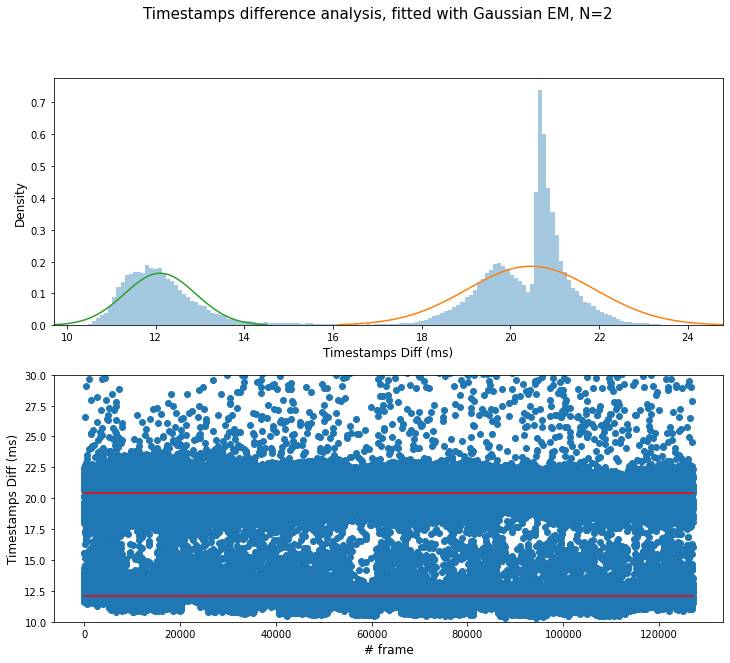

In [617]:
timesteps_diff_analysis(diffs,all_df,k=None,bins=550,n_gmm=2)

/home/user/miniconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:13: PerformanceWarning: indexing past lexsort depth may impact performance.
  del sys.path[0]


(5080,)
mean: 20.206, sig: 1.231, weight: 0.680
mean: 12.414, sig: 0.386, weight: 0.320


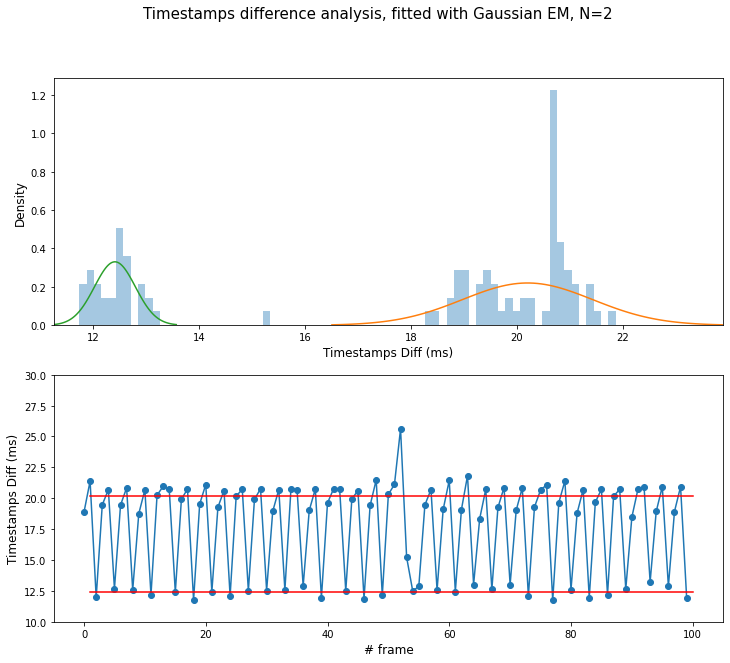

In [634]:
timesteps_diff_analysis(diffs,all_df,k=100,plotline=True)

In [350]:
# RT only and no streaming, other cameras
RT_ONLY = '../Pogona_Pursuit/Arena/experiments/test-no-streaming-rt-only_20200810T120030/trial1/videos/20200810-120033/timestamps/19506468.csv'
NO_STREAM = '../Pogona_Pursuit/Arena/experiments/test-no-streaming-4_20200810T115814/trial1/videos/20200810-115815/timestamps/19506468.csv'

NO_STREAM_55 = '../Pogona_Pursuit/Arena/experiments/test-no-streaming-4_20200810T115814/trial1/videos/20200810-115815/timestamps/19506455.csv'
NO_STREAM_75 =  '../Pogona_Pursuit/Arena/experiments/test-no-streaming-4_20200810T115814/trial1/videos/20200810-115815/timestamps/19506478.csv'

def parse_ts(path):
    df = pd.read_csv(RT_ONLY,parse_dates=['0'],usecols=['0'])
    df.columns = ['timestamp']
    return df

def get_ts_diffs(ser):
    return ser.diff().dropna().dt.total_seconds().values

rt_diffs = get_ts_diffs(parse_ts(RT_ONLY).timestamp)
no_str_diffs = get_ts_diffs(parse_ts(NO_STREAM).timestamp)
no_str55 = get_ts_diffs(parse_ts(NO_STREAM_55).timestamp)
no_str75 = get_ts_diffs(parse_ts(NO_STREAM_75).timestamp)


In [417]:
all_df.loc[('line_20200803T081429', 1)].iloc[2:2].shape

/home/user/miniconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


(0, 16)

In [425]:
testdf.index = pd.MultiIndex.from_tuples([('line_20200803T081429', 1,2) for k in range(testdf.shape[0])])

In [427]:
testdf

centroid_x  centroid_y      left_x       top_y  \
line_20200803T081429 1 2  1001.973328  744.859730  951.973328  704.859730   
                       2  1001.659409  743.726990  951.659409  703.726990   
                       2  1001.980980  744.570805  951.980980  704.570805   
                       2  1001.342079  743.889633  951.342079  703.889633   
                       2  1001.882412  744.529049  951.882412  704.529049   
                       2  1002.080669  744.854263  952.080669  704.854263   
                       2  1002.364952  744.287369  951.364952  704.287369   
                       2  1001.747429  745.027859  951.747429  706.027859   
                       2  1001.873810  744.807446  951.873810  704.807446   
                       2  1002.394054  744.933613  952.394054  704.933613   

                              right_x    bottom_y      conf  num_bbox  \
line_20200803T081429 1 2  1053.493713  785.472546  0.988369       1.0   
                       2  1052.953751  785.046570  0.993245       1.0   
                       2  1052.929787  785.393673  0.992465       1.0   
                       2  1052.917442  785.432266  0.992419       1.0   
                       2  1053.409702  785.115849  0.993147       1.0   
                       2  1053.337421  785.625839  0.991830       1.0   
                       2  1053.716469  785.482773  0.992484       1.0   
                       2  1053.586311  784.933445  0.990803       1.0   
                       2  1053.027435  785.448170  0.992844       1.0   
                       2  1053.879627  785.186749  0.992074       1.0   

                                             timestamp  hit_x  hit_y  bug_x  \
line_20200803T081429 1 2 2020-08-03 08:14:29.869937658    NaN    NaN    NaN   
                       2 2020-08-03 08:14:29.918991566    NaN    NaN    NaN   
                       2 2020-08-03 08:14:29.934581041    NaN    NaN    NaN   
                       2 2020-08-03 08:14:29.947722673    NaN    NaN    NaN   
                       2 2020-08-03 08:14:29.959564209    NaN    NaN    NaN   
                       2 2020-08-03 08:14:29.972431421    NaN    NaN    NaN   
                       2 2020-08-03 08:14:29.984919071    NaN    NaN    NaN   
                       2 2020-08-03 08:14:29.996504307    NaN    NaN    NaN   
                       2 2020-08-03 08:14:30.010262728    NaN    NaN    NaN   
                       2 2020-08-03 08:14:30.031894445    NaN    NaN    NaN   

                          bug_y touch_ts    hit  frame_ind  
line_20200803T081429 1 2    NaN      NaT  False          0  
                       2    NaN      NaT  False          1  
                       2    NaN      NaT  False          2  
                       2    NaN      NaT  False          3  
                       2    NaN      NaT  False          4  
                       2    NaN      NaT  False          5  
                       2    NaN      NaT  False          6  
                       2    NaN      NaT  False          7  
                       2    NaN      NaT  False          8  
                       2    NaN      NaT  False          9

In [438]:
ser = all_df.iloc[:25].frame_ind

In [441]:
ser.iloc[0]

0

In [603]:
def get_k_before_hits(df,k):
    """
    for each index of a hit row, slice the k>=1 previous rows (including hit) as a multiindex dataframe 
    with triple index: experiment, trial, hit-event. concatenate dataframes vertically
    # edge case 1: index of hit <= k
    solution: in trial dataframe, take max between 0 and index of hit - k
    
    # edge case 2: the k previous frames include another hit event
    solution: take number of frames until one before the hit frame
    """
    assert type(k)==int
    assert k>0
    
    df_list = []
    for trial in df.index.unique():
        hits_ind = df.loc[trial]
        hits_ind = hits_ind[hits_ind.hit].frame_ind
        if hits_ind.shape[0] == 0:
            continue
        #display(hits_ind)
        #return
        event_list = []
        for j, hit_ind in enumerate(hits_ind):
            if j==0:
                min_slice = np.max([0,hit_ind-k])
            else:
                min_slice = np.max([0,hit_ind-k,hits_ind[j-1]])
            max_slice = hit_ind + 1
            sliced_event = df.loc[trial].iloc[min_slice:max_slice]
            sliced_event.index = pd.MultiIndex.from_tuples([(trial[0],trial[1],j) for\
                                                            k in range(sliced_event.shape[0])])
            event_list.append(sliced_event)
        
        df_list.append( pd.concat(event_list))
    return pd.concat(df_list)
    
    
    

In [636]:
import warnings
warnings.filterwarnings(action='once')
#warnings.filterwarnings('ignore')
#warnings.filterwarnings('default')

In [605]:
events = get_k_before_hits(all_df,8)

/home/user/miniconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
/home/user/miniconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
/home/user/miniconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
/home/user/miniconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
/home/user/miniconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
/home/user/miniconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
/home/user/miniconda/envs/py36/lib/python3.6/site-packages

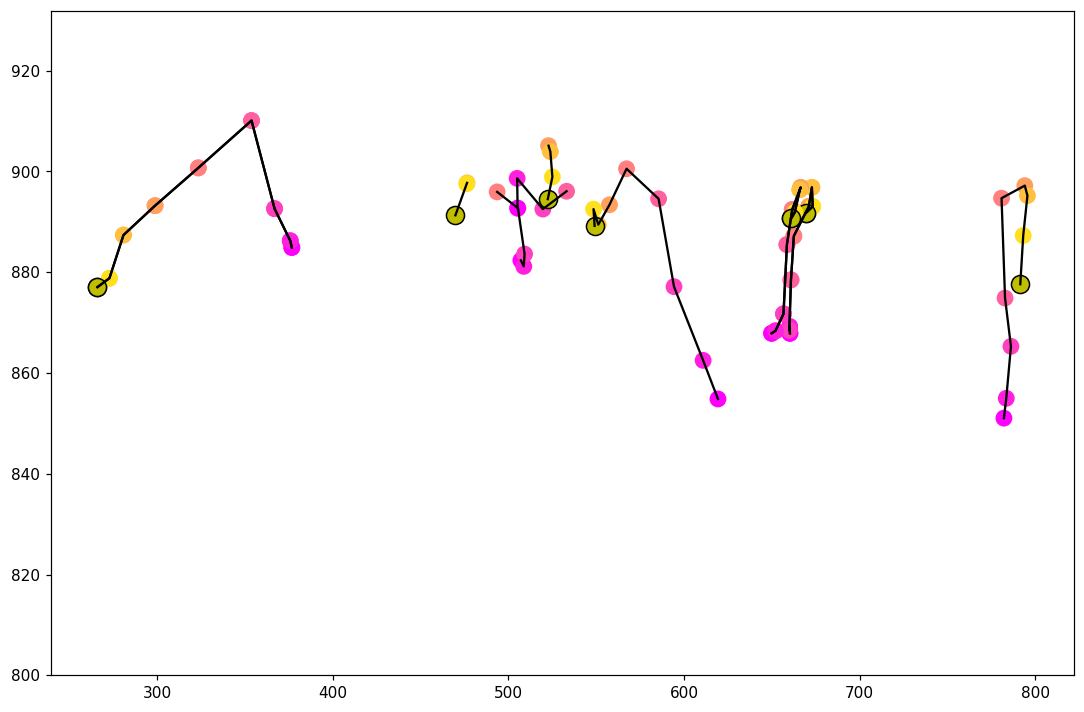

In [638]:
from math import ceil
WIDTH =  1440
HEIGHT = 1080
#rand_evnet_ind = np.random.choice(events.index.unique())

#df = events
#mask = events.hit


K = 10
events_inds = np.random.choice(events.index.unique(),size=K)
num_events = K
rows = ceil(np.sqrt(num_events))
cols = rows

plt.figure(figsize=(12,8),dpi=110)
#fig,axes = plt.subplots(rows,cols,figsize=(15,15))

for i,event in enumerate(events_inds):
    df = events.loc[event]
    mask = df.hit
    maxy = np.max(df[mask].centroid_y)
    colors = df.frame_ind
    #axes[i // rows,i % cols].scatter(df[~mask].centroid_x,df[~mask].centroid_y,color='g',label='prev')
    #axes[i // rows,i % cols].plot(df[~mask].centroid_x,df[~mask].centroid_y,color='k')
    
    #axes[i // rows,i % cols].scatter(df.centroid_x,df.centroid_y,cmap='seismic',c=colors,label='prev',s=100)
    #axes[i // rows,i % cols].scatter(df[mask].centroid_x,df[mask].centroid_y,color='g',label='hits',s=120)
    #axes[i // rows,i % cols].plot(df.centroid_x,df.centroid_y,color='k')
    plt.plot(df.centroid_x,df.centroid_y,color='k')
    plt.scatter(df.centroid_x,df.centroid_y,cmap='spring',c=colors,label='prev',s=100)
    plt.scatter(df[mask].centroid_x,df[mask].centroid_y,color='y',label='hits',s=140,edgecolors='k')
    

#plt.scatter(df[~mask].centroid_x,df[~mask].centroid_y,color='g',label='prev')
#plt.scatter(df[mask].centroid_x,df[mask].centroid_y,color='r',label='hits')


#plt.xlim(0,WIDTH)
plt.ylim(800,np.max(events.centroid_y)+20)
#plt.plot(np.linspace(0,WIDTH,10),np.ones(10)*maxy,color='r',linestyle=':',label='max y')
plt.savefig('hits_trajectories.png')

#plt.legend()


#img = cv.imread('chkr2above.jpg')
#img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#img = cv.resize(img,(WIDTH,HEIGHT))
#plt.imshow(img,alpha=0.6,cmap='Greys_r')

In [570]:
df = events[events.hit]
diffs = (df.timestamp - df.touch_ts).dt.total_seconds().abs().round(6).values * 1000

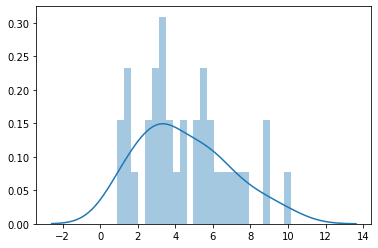

In [574]:
sns.distplot(diffs,bins=25)

Text(0.5, 1.0, '')

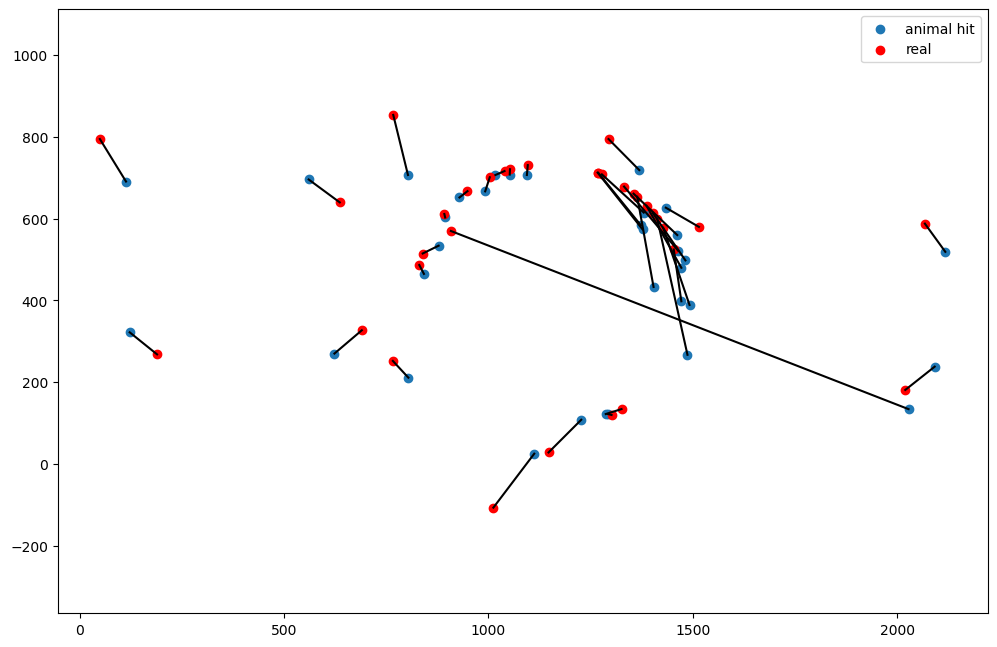

In [96]:
plt.figure(figsize=(12,8),dpi=100)
mask = all_df.hit
plt.scatter(all_df[mask].hit_x,all_df[mask].hit_y,label='animal hit')
plt.scatter(all_df[mask].bug_x,all_df[mask].bug_y,label='real',color='r')
for row in all_df[mask].iterrows():
    p1 = row[1][['hit_x','hit_y']].values
    p2 = row[1][['bug_x','bug_y']].values
    ps = np.stack([p1,p2])
    plt.plot(ps[:,0],ps[:,1],color='k')
plt.legend()
plt.axis('equal')
plt.title('')

In [111]:
all_df['touch_ts'] = pd.to_datetime(all_df['touch_ts'])
touch = all_df[all_df.hit]

In [119]:
(touch.timestamp - touch.touch_ts).dt.total_seconds().abs().mean()*1000

4.49042344117647

In [639]:
all_df.head()

centroid_x  centroid_y      left_x       top_y  \
line_20200803T081429 1  1001.973328  744.859730  951.973328  704.859730   
                     1  1001.659409  743.726990  951.659409  703.726990   
                     1  1001.980980  744.570805  951.980980  704.570805   
                     1  1001.342079  743.889633  951.342079  703.889633   
                     1  1001.882412  744.529049  951.882412  704.529049   

                            right_x    bottom_y      conf  num_bbox  \
line_20200803T081429 1  1053.493713  785.472546  0.988369       1.0   
                     1  1052.953751  785.046570  0.993245       1.0   
                     1  1052.929787  785.393673  0.992465       1.0   
                     1  1052.917442  785.432266  0.992419       1.0   
                     1  1053.409702  785.115849  0.993147       1.0   

                                           timestamp  hit_x  hit_y  bug_x  \
line_20200803T081429 1 2020-08-03 08:14:29.869937658    NaN    NaN    NaN   
                     1 2020-08-03 08:14:29.918991566    NaN    NaN    NaN   
                     1 2020-08-03 08:14:29.934581041    NaN    NaN    NaN   
                     1 2020-08-03 08:14:29.947722673    NaN    NaN    NaN   
                     1 2020-08-03 08:14:29.959564209    NaN    NaN    NaN   

                        bug_y touch_ts    hit  frame_ind  
line_20200803T081429 1    NaN      NaT  False          0  
                     1    NaN      NaT  False          1  
                     1    NaN      NaT  False          2  
                     1    NaN      NaT  False          3  
                     1    NaN      NaT  False          4

In [150]:
for i,row in enumerate(X1):
    print(i,row)

In [181]:
from matplotlib import transforms

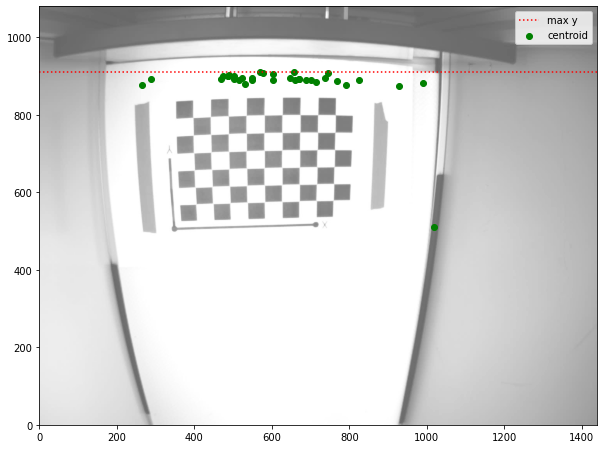

In [453]:
WIDTH =  1440
HEIGHT = 1080
plt.figure(figsize=(10,10))
#plt.axis('equal')

#samp = all_df.sample(100).dropna(axis=0,subset=['centroid_x'])
samp = all_df[all_df.hit]

X1 = samp.centroid_x
Y1 = samp.bottom_y
X2 = samp.centroid_x
Y2 = samp.centroid_y

#plt.scatter(x=X1,y=Y1,label='bottom',color='r')
plt.scatter(x=X2,y=Y2,color='g',label='centroid')
#miny = np.min([np.min(Y1),np.min(Y2)])
#maxy = np.max([np.max(Y1),np.max(Y2)])
maxy = np.max(Y2)

plt.xlim(0,WIDTH)
plt.ylim(0,HEIGHT)
plt.plot(np.linspace(0,WIDTH,10),np.ones(10)*maxy,color='r',linestyle=':',label='max y')

plt.legend()


img = cv.imread('chkr2above.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.resize(img,(WIDTH,HEIGHT))
plt.imshow(img,alpha=0.6,cmap='Greys_r')

### Comparing DLC - nose joint and YOLO head centroid

In [79]:
yolo_df = all_exper[dlc_example]['trials'][dlc_example_trial]['frames'][['centroid_x','centroid_y']]
yolo_df.columns = ['x','y']
dlc_df = dlc['nose'][['x','y']]

(0.0, 1000.0)

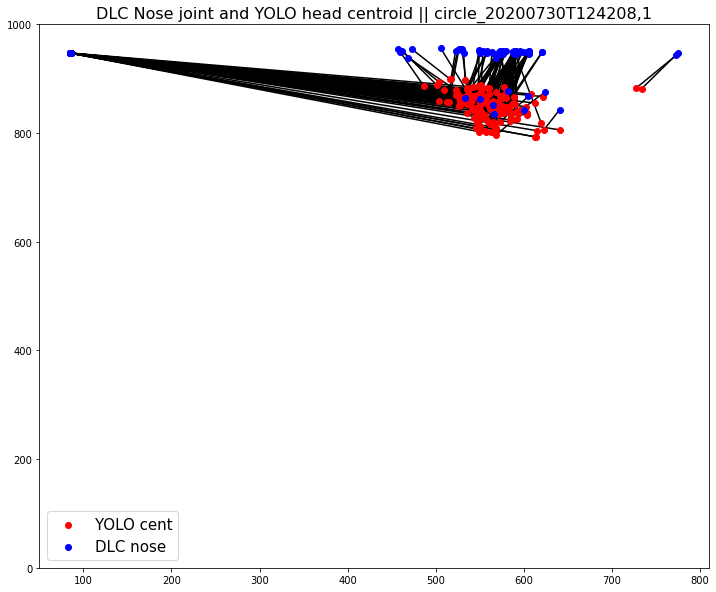

In [130]:
plt.figure(figsize=(12,10))

samp = pd.concat([yolo_df,dlc_df],axis=1).sample(200)
samp.columns = ['yolo_x','yolo_y','dlc_x','dlc_y']
for row in samp.iterrows():
    p1 = row[1][:2].values
    p2 = row[1][2:4].values
    ps = np.stack([p1,p2])
    plt.plot(ps[:,0],ps[:,1],color='k',zorder=0)

#plt.scatter(x=yolo_df.x,y=yolo_df.y,color='r',label='YOLO cent')
plt.scatter(x=samp.yolo_x,y=samp.yolo_y,color='r',label='YOLO cent',zorder=2)

#plt.scatter(x=dlc_df.x,y=dlc_df.y,color='b',label='DLC nose')
plt.scatter(x=samp.dlc_x,y=samp.dlc_y,color='b',label='DLC nose',zorder=3)

plt.legend(fontsize=15)
plt.title(f'DLC Nose joint and YOLO head centroid || {dlc_example},{dlc_example_trial}',fontsize=16)
plt.ylim(0,1000)

In [5]:
imp.reload(dataset)

<module 'Dataset.dataset' from '/app/Pogona_realtime/Dataset/dataset.py'>

In [7]:
d = dataset.analyze_experiment("../Pogona_Pursuit/Arena/experiments/circle_20200803T120911", detector)

  0%|          | 4/5081 [00:00<02:32, 33.37it/s]

analysing ../Pogona_Pursuit/Arena/experiments/circle_20200803T120911
analysing ../Pogona_Pursuit/Arena/experiments/circle_20200803T120911/trial1/videos/20200803-120911/19506468.avi, num_frames 5081


100%|██████████| 5081/5081 [01:32<00:00, 54.80it/s]


In [11]:
d.keys()

dict_keys(['name', 'animal_id', 'num_trials', 'bug_type', 'bug_speed', 'mov_type', 'trials', 'no_dlc'])

In [19]:
d['trials'][1]['frames']

,centroid_x,centroid_y,left_x,top_y,right_x,bottom_y,conf,num_bbox,exper_name,trial,timestamp,hit_x,hit_y,bug_x,bug_y,touch_ts,hit
0,631.847351,635.558277,585.847351,594.558277,92.870605,83.004295,0.992603,1.0,circle_20200803T120911,1,2020-08-03 12:09:11.283965111,NaN,NaN,NaN,NaN,NaN,False
1,635.811512,633.703232,587.811512,591.703232,97.584740,84.627960,0.993092,1.0,circle_20200803T120911,1,2020-08-03 12:09:11.302442551,NaN,NaN,NaN,NaN,NaN,False
2,636.677029,632.965279,588.677029,590.965279,97.264229,84.850571,0.993700,1.0,circle_20200803T120911,1,2020-08-03 12:09:11.315297842,NaN,NaN,NaN,NaN,NaN,False
3,635.868599,633.716389,588.868599,591.716389,95.337143,84.409264,0.993496,1.0,circle_20200803T120911,1,2020-08-03 12:09:11.336664677,NaN,NaN,NaN,NaN,NaN,False
4,635.343517,634.271812,589.343517,592.271812,92.870583,84.974564,0.993840,1.0,circle_20200803T120911,1,2020-08-03 12:09:11.349446297,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5076,835.397644,843.409763,796.397644,795.409763,79.089844,96.514336,0.948455,1.0,circle_20200803T120911,1,2020-08-03 12:10:41.210280895,NaN,NaN,NaN,NaN,NaN,False
5077,834.947803,844.358459,794.947803,797.358459,80.172020,94.030762,0.962074,1.0,circle_20200803T120911,1,2020-08-03 12:10:41.231974125,NaN,NaN,NaN,NaN,NaN,False
5078,834.823608,843.411182,795.823608,796.411182,79.724976,95.406395,0.934434,1.0,circle_20200803T120911,1,2020-08-03 12:10:41.244113445,NaN,NaN,NaN,NaN,NaN,False
5079,835.691833,844.332653,796.691833,797.332653,78.438477,94.653664,0.955987,1.0,circle_20200803T120911,1,2020-08-03 12:10:41.263161421,NaN,NaN,NaN,NaN,NaN,False


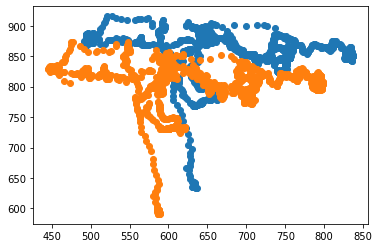

In [35]:
plt.scatter(d['trials'][1]['frames'].centroid_x, d['trials'][1]['frames'].centroid_y)
plt.scatter(d['trials'][1]['frames'].left_x, d['trials'][1]['frames'].top_y)

In [44]:
imp.reload(visualize)
input_vid = "../Pogona_Pursuit/Arena/experiments/circle_20200803T091639/trial1/videos/20200803-091641/19506468.avi"
df = all_exper['circle_20200803T091639']['trials'][1]['frames']
centroids = df[['centroid_x', 'centroid_y']].values

In [45]:
centroids

array([[628.59762192, 881.9824791 ],
       [627.8692627 , 882.10374832],
       [627.79000473, 881.33314514],
       ...,
       [605.82538223, 767.00532532],
       [606.39041138, 766.98987961],
       [605.85353851, 766.88560104]])

In [47]:
visualize.process_video(input_vid, "labelled/test_offline_cents_arrows.mp4", 
                        [visualize.offline_centroid_visualizer(centroids, (0,0,255), 90),
                         visualize.offline_arrow_visualizer(centroids, 30)])

100%|██████████| 5081/5081 [01:14<00:00, 68.07it/s]
